# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# increase fontsize of plots
plt.rcParams.update({'font.size': 13})

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


Download the dataset with google drive and load it(Google Colab):

In [ ]:
# connect to google drive
from google.colab import drive
import pandas as pd

# mount on google drive
drive.mount('/content/drive')
# unzip
!unzip /content/drive/MyDrive/archive.zip
# import into dataset
df = pd.read_csv('/content/dataset2.csv', engine ='pyarrow')

Import dataset locally:

In [2]:
import pandas as pd
df = pd.read_csv('/home/tomruge/Schreibtisch/UNI/Semester_7/machine_learning_with_tensorflow/archive_physical_activity.csv', engine ='pyarrow')

General information about the dataset

In [3]:

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]-2

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

print('Columns: ', df.columns)
# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())




Number of samples: 2864056
Number of features: 31
Columns:  Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')
Example data:
             activityID  heart_rate  h

## Handling Missing Values



In [4]:
import numpy as np
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values:')
missing_values


Missing values:


activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y          0
ankle ma

As one can see, there are missing only 46 haert_rate values. So simply dropping them would be no problem.

In [6]:
df = df.dropna()   

## Feature Distributions



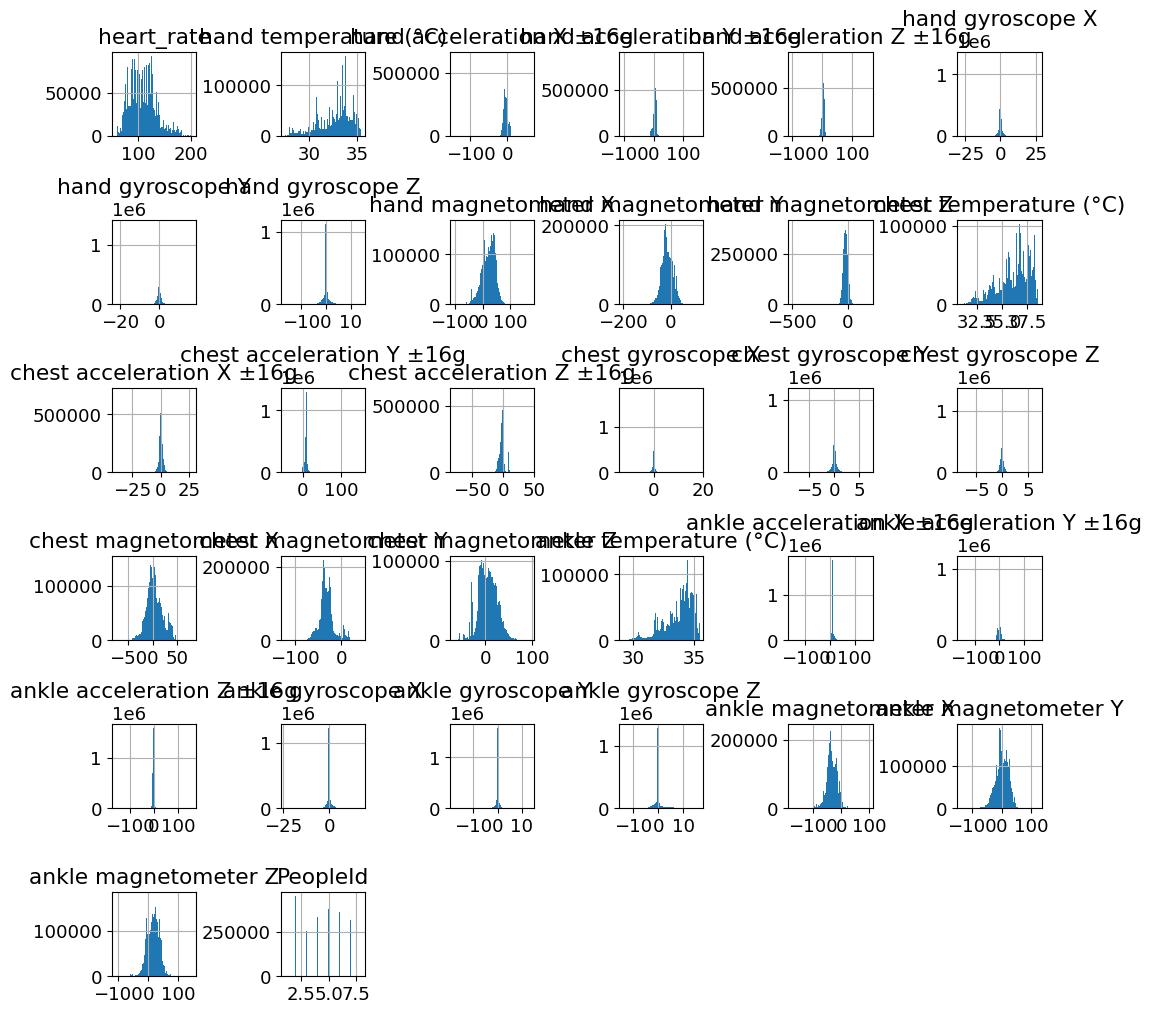

In [5]:
import matplotlib.pyplot as plt
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12), bins = 100)
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


## Possible Biases

Class Imbalance:

<Axes: xlabel='PeopleId', ylabel='count'>

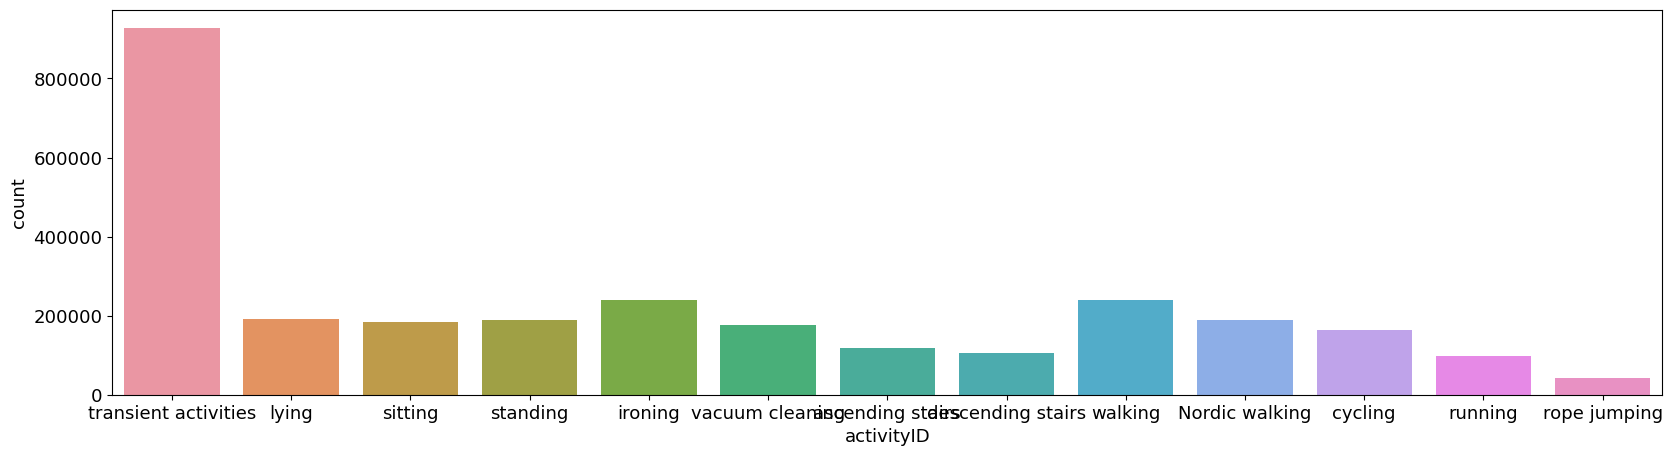

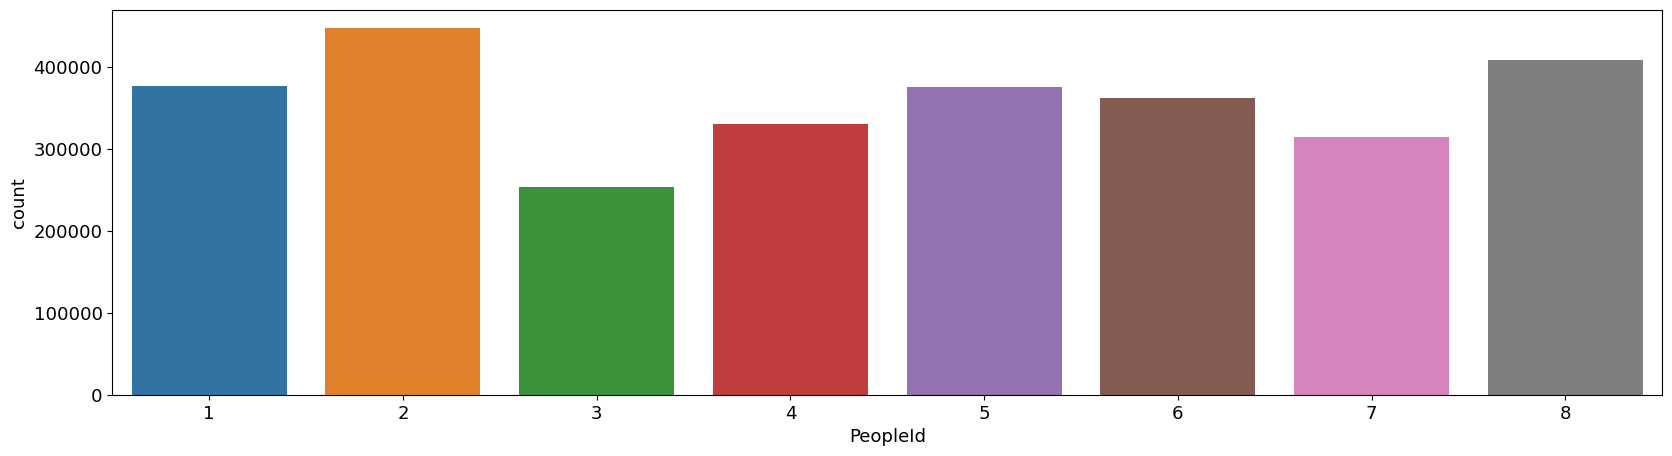

In [31]:
import seaborn as sns

# Example: Checking for class imbalance in a classification problem
plt.figure(figsize=(20,5))
sns.countplot(x='activityID', data=df)

plt.figure(figsize=(20,5))
sns.countplot(x='PeopleId', data=df)




Plot of some features as timeseries:

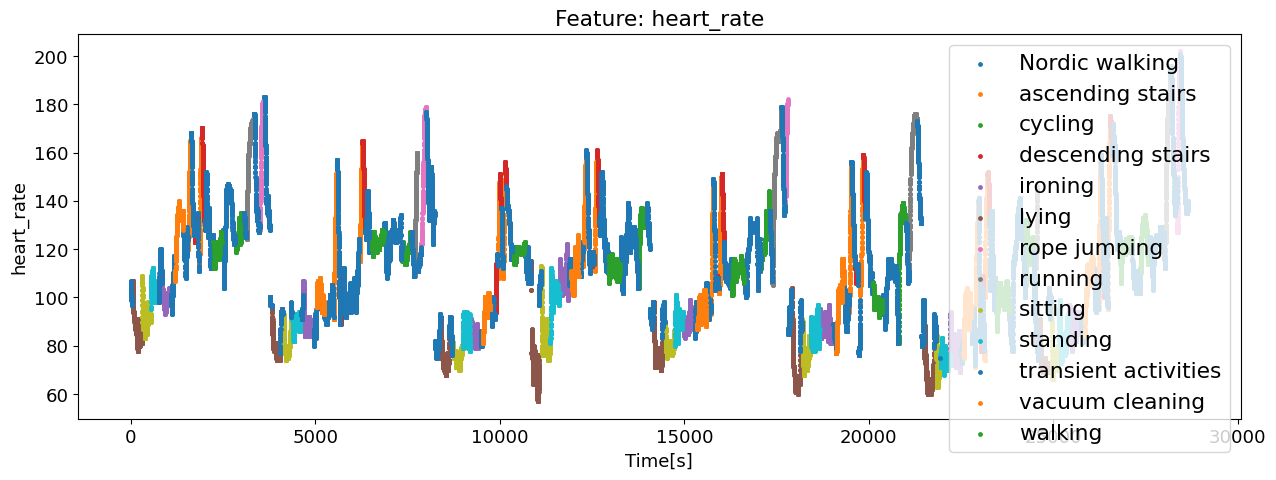

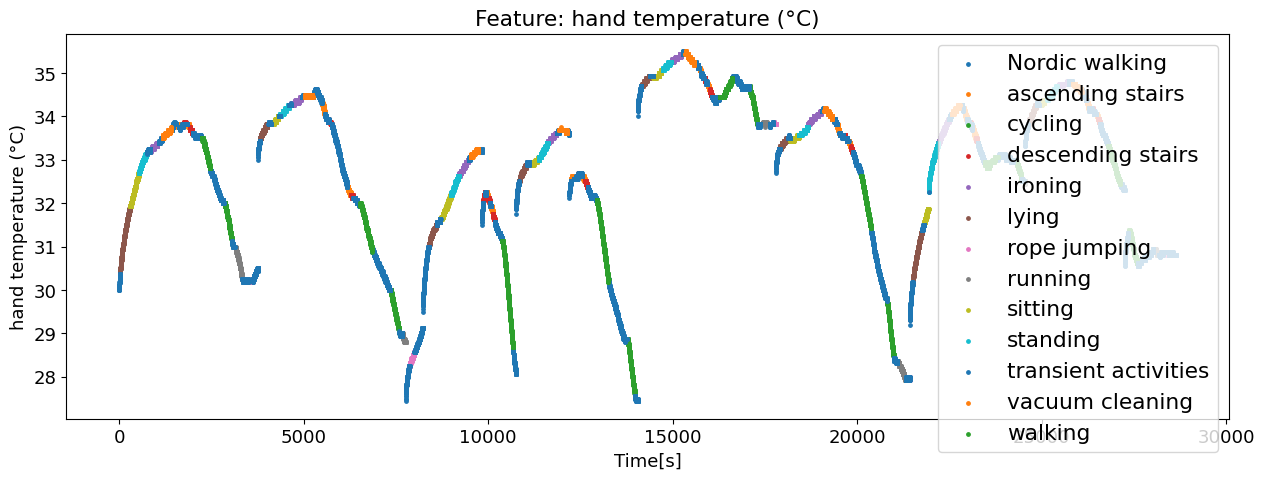

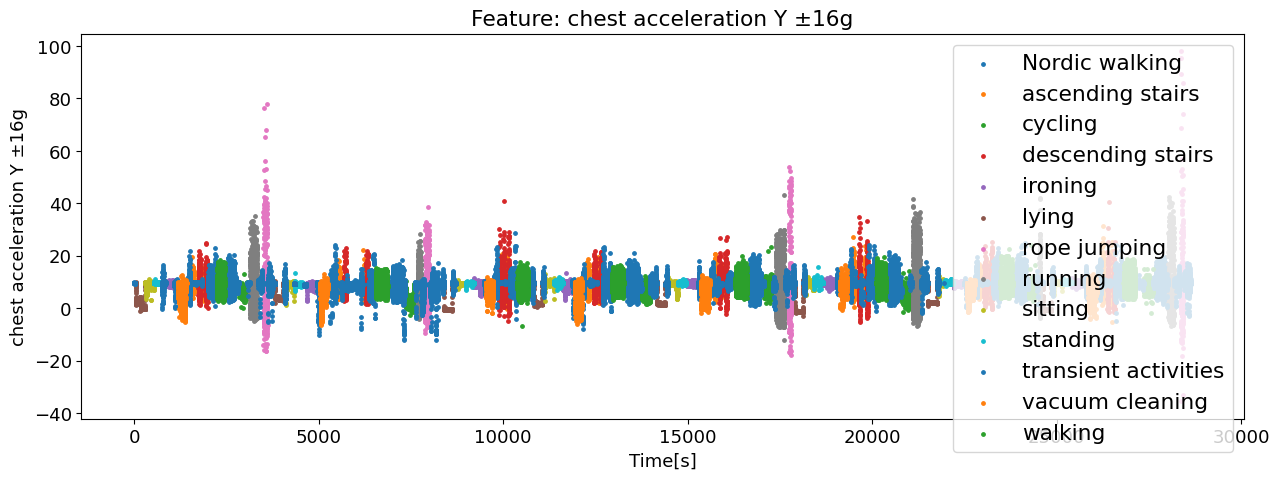

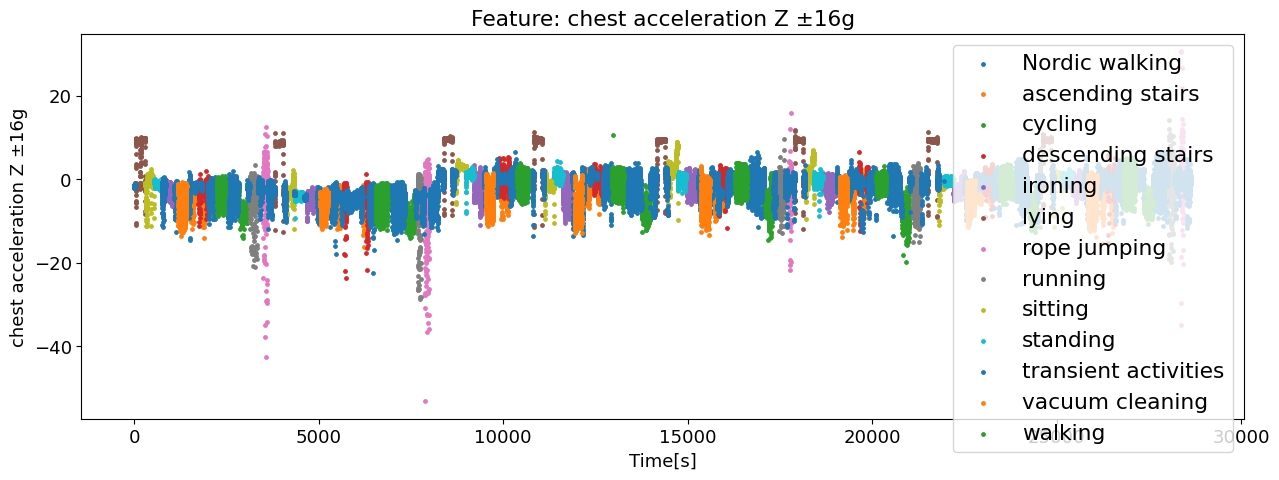

In [10]:
# plot the features
import matplotlib.pyplot as plt
features = np.unique(df['activityID'])
t = np.array([0.01*i for i in range(len(df))])
columns = ['heart_rate','hand temperature (°C)','chest acceleration Y ±16g', 'chest acceleration Z ±16g',]
for c in columns:
  plt.figure(figsize=(15,5))
  for i in features:
    mask = (df['activityID'] == i)
    # only each 10th column i want to plot
    plt.scatter(t[mask][::30], df[mask][c].values[::30], label = i, s= 6)
    plt.legend(fontsize = 'large')
    plt.title(f'Feature: {c}')
    plt.xlabel('Time[s]')
    plt.ylabel(c)
  plt.show()

Zoom in heartbeat of 1 person:

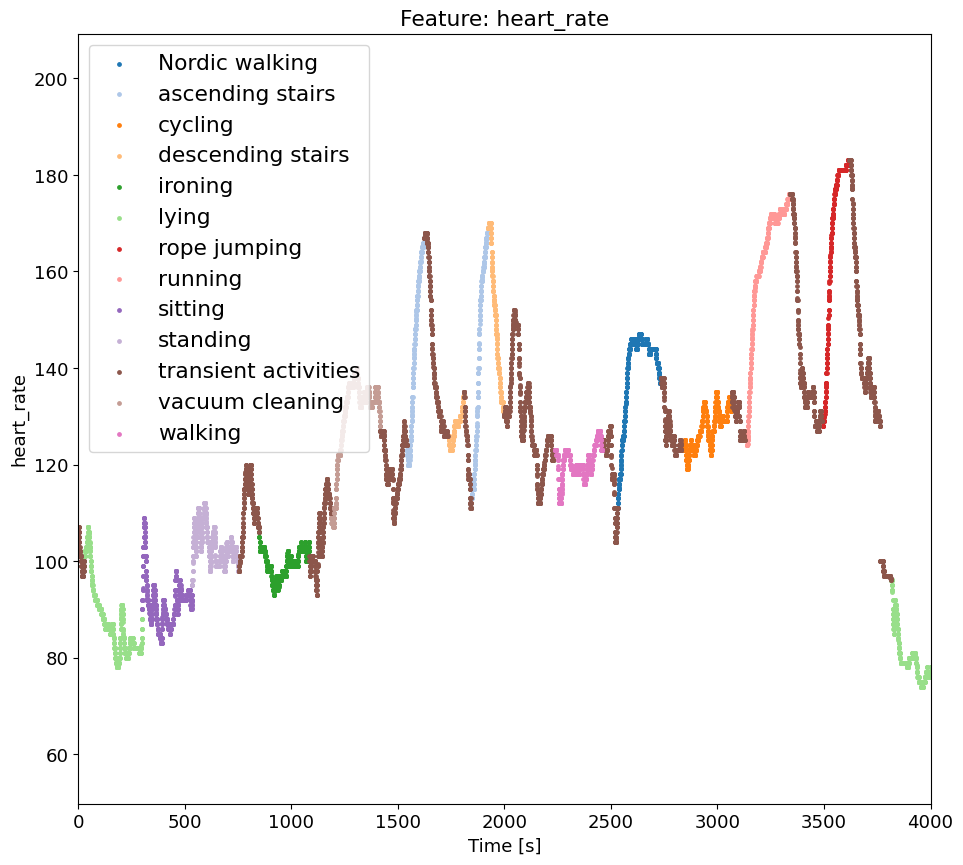

In [17]:
import matplotlib.pyplot as plt
import numpy as np

features = np.unique(df['activityID'])
t = np.array([0.01 * i for i in range(len(df))])
columns = ['heart_rate']

# Use tab20 colormap
colors = plt.cm.tab20.colors

for c in columns:
    plt.figure(figsize=(11, 10))
    for i, feature in enumerate(features):
        mask = (df['activityID'] == feature)
        # Only plot every 10th point for better visibility
        plt.scatter(t[mask][::30], df[mask][c].values[::30], label=str(feature), s=6, color=colors[i % len(colors)])

    plt.legend(fontsize='large')
    plt.title(f'Feature: {c}')
    plt.xlim(0, 4000)
    plt.xlabel('Time [s]')
    plt.ylabel(c)
    plt.show()


Investigate the order of physical activities

/home/tomruge/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


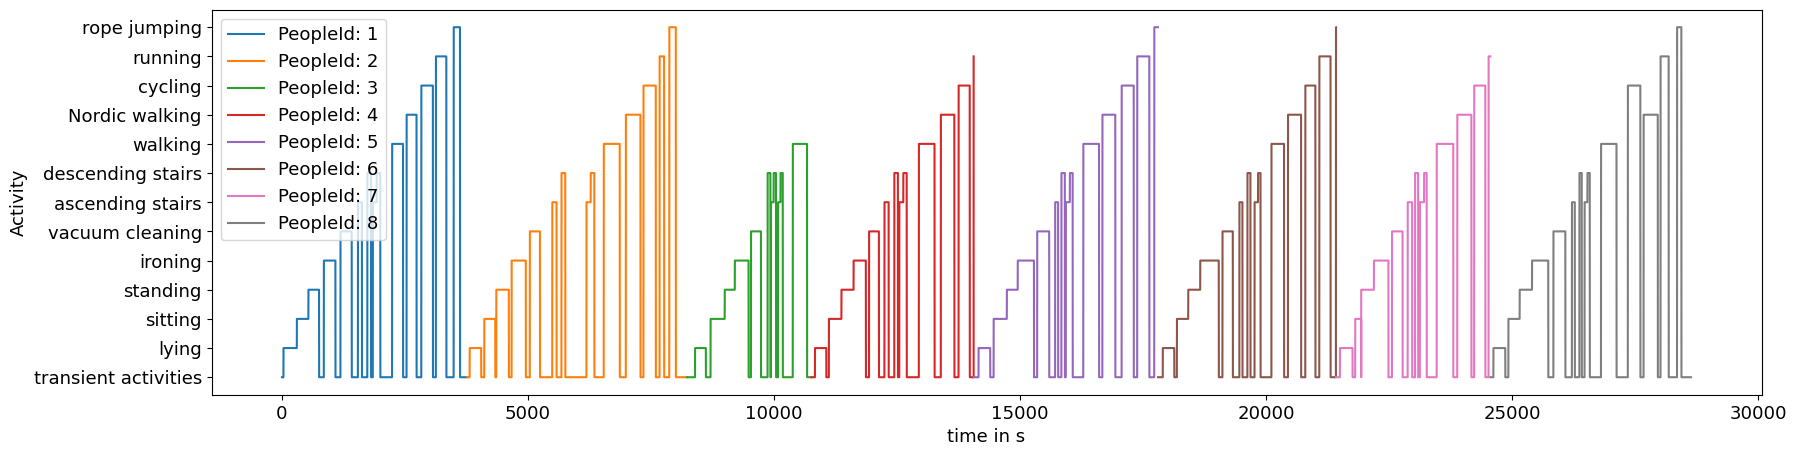

In [4]:
plt.figure(figsize=(20,5))
t = np.array([0.01*i for i in range(len(df))])
people_ids = np.unique(df['PeopleId'])
for i in people_ids:
  mask = (df['PeopleId'] == i)
  plt.plot(t[mask], df[mask]['activityID'], label = 'PeopleId: ' +str(i) )

plt.legend()
plt.ylabel('Activity')
plt.xlabel('time in s')
plt.show()

-> Sampling Bias

## Correlations


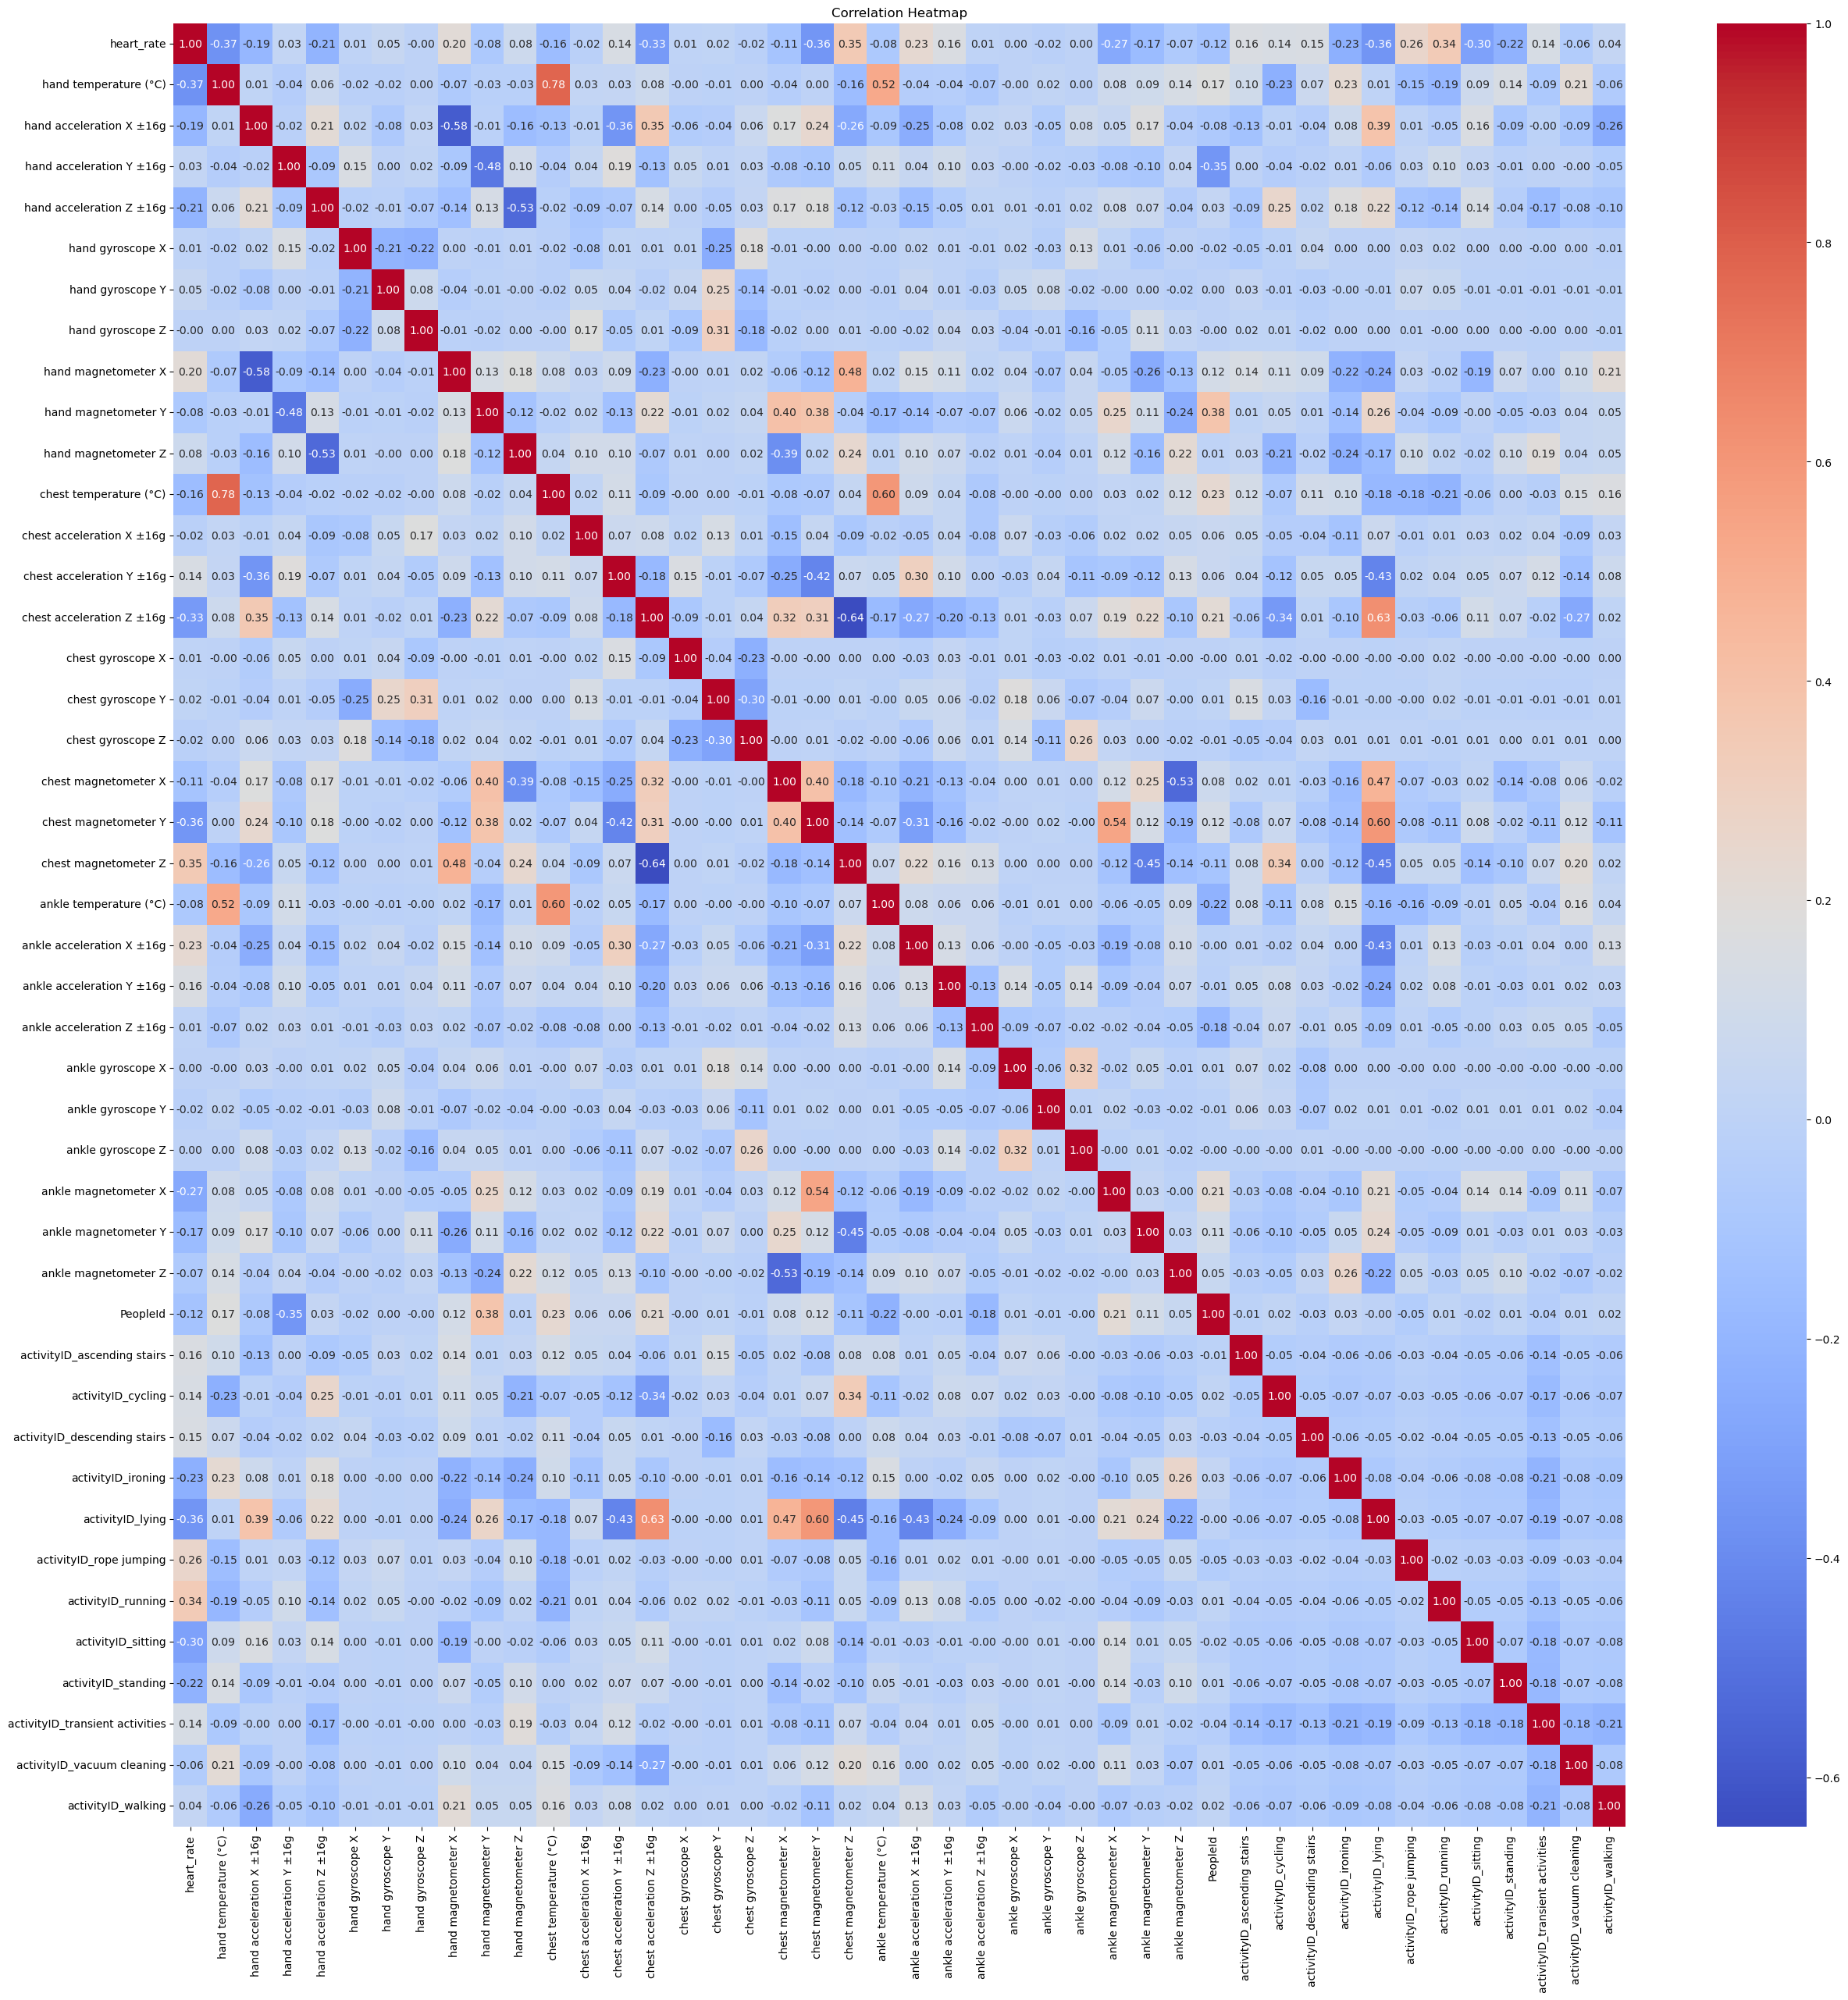

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Encode categorical variable using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['activityID'], drop_first=True)

plt.figure(figsize=(30, 30))

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


As one can see, some measurements aspects result in a good correlation. For example heart rate.